In [1]:
cd ..

/home/thejevans/git/umd_icecube_analysis_tutorial


In [2]:
__author__ = 'John Evans'
__copyright__ = ''
__credits__ = ['John Evans', 'Jason Fan', 'Michael Larson']
__license__ = 'Apache License 2.0'
__version__ = '0.0.1'
__maintainer__ = 'John Evans'
__email__ = 'jevans96@umd.edu'
__status__ = 'Development'

"""
Docstring
"""

import numpy as np
from i3pubtools import tools
from i3pubtools import time_profiles
from i3pubtools.llhs import ps_flare_llh
import test.test_data as test_data
import glob
from scipy import stats
from matplotlib import pyplot as plt

np.random.seed(0)

In [3]:
# Load in both the simulation and the data

# # Where is the dataset stored?
# dataset = '/data/mjlarson/data/'

# # Read in all of the data files
# data_files = dataset + '/IC86_*exp.npy'
# data = tools.read(glob.glob(data_files))

# # Read in all of the MC files 
# sim_files = dataset + '/IC86*MC*npy'
# sim = tools.read(glob.glob(sim_files))

data_size = 10000
sim_size = 100000

data = test_data.get_random_data(data_size)
sim = test_data.get_random_sim(sim_size)

# Set the angular error floor to 0.2 degrees
data['angErr'][data['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)
sim['angErr'][sim['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)


# Show the possible keys available here:
print('Events available in simulation: {}'.format(len(sim)))
print('Keys available in simulation:')
print(sorted(sim.dtype.names))
print()

print('Events available in data: {}'.format(len(data)))
print('Keys available in data:')
print(sorted(data.dtype.names))

Events available in simulation: 100000
Keys available in simulation:
['angErr', 'azi', 'dec', 'event', 'logE', 'ow', 'ra', 'run', 'subevent', 'time', 'trueDec', 'trueE', 'trueRa', 'zen']

Events available in data: 10000
Keys available in data:
['angErr', 'azi', 'dec', 'event', 'logE', 'ra', 'run', 'subevent', 'time', 'zen']


In [4]:
# # Also load in the 'GoodRunList' (GRL), a file that tells
# # us when the detector was taking good data. 
# grl_files = dataset + '/GRL/IC86_*exp.npy'
# grl = tools.read(glob.glob(grl_files))
grl = test_data.get_random_grl(data)


# Show the keys available in the GRL
print('Keys available in the GoodRunList:')
print(sorted(grl.dtype.names))

gammas = np.arange(-4.25, -0.5, 0.25)
bins   = np.array([np.linspace(-1, 1, 51), # sin(dec)
                   np.linspace(1, 8, 51)]) # logE

Keys available in the GoodRunList:
['events', 'livetime', 'run', 'start', 'stop']


In [5]:
# Try this with a gaussian signal + uniform background.
signal_time_profile = time_profiles.GaussProfile(56102.5, 0.01)
background_time_profile = time_profiles.UniformProfile(56102.48, 56102.52)
source = {'ra':np.pi/2, 'dec':np.pi/6}

In [6]:
# Run this block once
llh_object = ps_flare_llh.PsFlareLLH(data, sim, grl, gammas, bins, outfile = './test/test_outputs/ps_flare_llh-test.npy', source = source,
                                     signal_time_profile = signal_time_profile, background_time_profile = background_time_profile)

  0%|          | 0/15 [00:00<?, ?it/s]/home/thejevans/git/umd_icecube_analysis_tutorial/i3pubtools/llhs/ps_flare_llh.py:119: RuntimeWarning: divide by zero encountered in true_divide
  ratio = sig_h / bg_h
100%|██████████| 15/15 [00:00<00:00, 59.34it/s]


In [7]:
# Afterwards, run this one to save time
llh_object = ps_flare_llh.PsFlareLLH(data, sim, grl, gammas, bins, infile = './test/test_outputs/ps_flare_llh-test.npy', source = source,
                                     signal_time_profile = signal_time_profile, background_time_profile = background_time_profile)

In [8]:
# Produce a single trial. Here, we pass a 'seed'
# value to the function so that we can reproduce
# the trial later if we want to. If you want it to
# be random, set seed=None.
seed = 0

trial = llh_object.produce_trial(flux_norm=1e-15, random_seed=seed)
print('Got {} events for this trial'.format(len(trial)))

print('Times:')
print(trial)

Got 61 events for this trial
Times:
[(130039, 6572833, 8, 1.67181765, -0.31971099, 3.63374332,  1.04368987, 56102.48099416, 2.77723118, 0.09744253)
 (846507, 9577494, 6, 3.9327342 , -0.80570431, 0.96577945,  1.60494225, 56102.48188721, 9.8666624 , 0.03784134)
 (868028,  525554, 5, 0.56570984,  0.50104065, 5.99984108,  2.15848111, 56102.48232566, 9.15485246, 0.0730477 )
 (857616, 1784800, 3, 4.26448566, -0.6092387 , 2.46578597, -0.12774933, 56102.48237961, 0.02528304, 0.07133405)
 (564852, 6298938, 5, 3.94710731, -1.14811936, 0.00778772,  2.34184315, 56102.48378913, 4.81346029, 0.05563169)
 (756019, 5168385, 4, 2.43926762, -0.37955518, 5.48304479, -0.75981688, 56102.48443976, 8.71827893, 0.04968286)
 (364512, 3956502, 3, 3.37809598,  0.08453361, 5.59780085, -2.28619604, 56102.48514096, 3.34978366, 0.0934793 )
 (376827, 9336896, 7, 2.56103472,  0.43163395, 5.98363882, -1.16766854, 56102.48862421, 8.49812157, 0.03875252)
 (475153,  427370, 5, 5.29936737,  0.14791555, 0.79089698, -1.964302

In [9]:
# Run the function with our test trial. Make sure
# you understand what's getting returned!
bestfit = llh_object.evaluate_ts(trial, ns=4, gamma=-2)
print(bestfit)

{'ts': nan, 'ns': 4.0, 'gamma': -2.0, 'gauss_tp_mean': 56102.49864967764, 'gauss_tp_sigma': 0.009185909937623065}


In [10]:
# Run trials for a few different values of N. These settings should
# exactly mimic your previous script
thousand_seconds = (1000.0)/(24*3600.)
llh_object.background_time_profile = time_profiles.UniformProfile(56044.0912963, 56044.0912963+thousand_seconds)
llh_object.signal_time_profile = llh_object.background_time_profile

background_fits = llh_object.produce_n_trials(1000, test_ns=0.1)
signal_16_fits = llh_object.produce_n_trials(1000, flux_norm=1e-16, test_ns=0.1)
signal_15_fits = llh_object.produce_n_trials(1000, flux_norm=1e-15, test_ns=0.1)
signal_14_fits = llh_object.produce_n_trials(1000, flux_norm=1e-14, test_ns=0.1)

Running Trials (N=1.00e-14, gamma=-2.0): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:11<00:00, 13.91 trials/s]


/usr/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6607: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6608: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


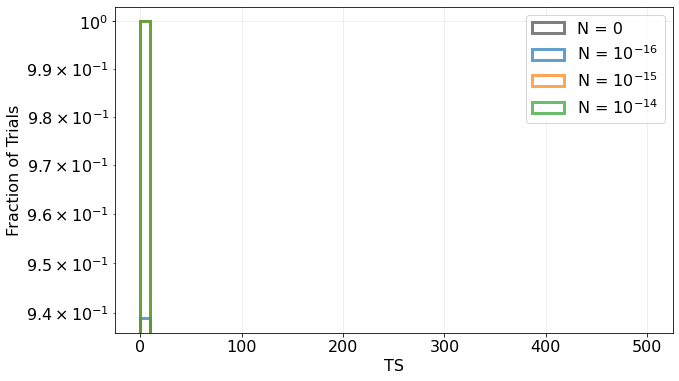

In [11]:
# Plot the signal and background LLHs
fig, ax = plt.subplots(figsize=(10,6))
bins = np.linspace(0, 500, 50)

ax.hist(background_fits['ts'],
        bins = bins,
        weights = np.ones(background_fits.shape[0])/len(background_fits),
        histtype = 'step',
        color = 'k',
        linewidth = 3,
        alpha=0.5,
        label = r'N = 0')

ax.hist(signal_16_fits['ts'],
        bins = bins,
        weights = np.ones(signal_16_fits.shape[0])/len(signal_16_fits),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'N = $10^{-16}$')

ax.hist(signal_15_fits['ts'],
        bins = bins,
        weights = np.ones(signal_15_fits.shape[0])/len(signal_15_fits),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'N = $10^{-15}$')

ax.hist(signal_14_fits['ts'],
        bins = bins,
        weights = np.ones(signal_14_fits.shape[0])/len(signal_14_fits),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'N = $10^{-14}$')

ax.legend(loc='upper right', fontsize=16,)

ax.grid(alpha=0.25)
ax.set_yscale('log')
ax.set_xlabel('TS', fontsize=16)
ax.set_ylabel('Fraction of Trials', fontsize=16)
ax.tick_params(which='both', labelsize=16)

In [12]:
# Try it again, but using a gaussian signal this time.
# WARNING: The gaussian time profile is kind of hacked
# together and may not give the most reliable results.
# Use with caution!
thousand_seconds = (1000.0)/(24*3600.)
llh_object.background_time_profile = time_profiles.UniformProfile(56044.0912963, 56044.0912963+thousand_seconds)
llh_object.signal_time_profile = time_profiles.GaussProfile(56044.0912963 + thousand_seconds/2, thousand_seconds/10)

background_fits = llh_object.produce_n_trials(1000, test_ns=0.1)
signal_16_fits = llh_object.produce_n_trials(1000, flux_norm=1e-16, test_ns=0.1)
signal_15_fits = llh_object.produce_n_trials(1000, flux_norm=1e-15, test_ns=0.1)
signal_14_fits = llh_object.produce_n_trials(1000, flux_norm=1e-14, test_ns=0.1)

Running Trials (N=1.00e-14, gamma=-2.0): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 38.63 trials/s]


/usr/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6607: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6608: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


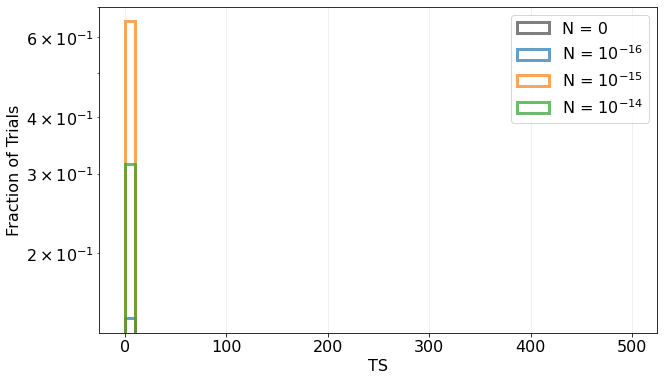

In [13]:
# Plot the signal and background LLHs
fig, ax = plt.subplots(figsize=(10,6))
bins = np.linspace(0, 500, 50)

ax.hist(background_fits['ts'],
        bins = bins,
        weights = np.ones(background_fits.shape[0])/len(background_fits),
        histtype = 'step',
        color = 'k',
        linewidth = 3,
        alpha=0.5,
        label = r'N = 0')

ax.hist(signal_16_fits['ts'],
        bins = bins,
        weights = np.ones(signal_16_fits.shape[0])/len(signal_16_fits),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'N = $10^{-16}$')

ax.hist(signal_15_fits['ts'],
        bins = bins,
        weights = np.ones(signal_15_fits.shape[0])/len(signal_15_fits),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'N = $10^{-15}$')

ax.hist(signal_14_fits['ts'],
        bins = bins,
        weights = np.ones(signal_14_fits.shape[0])/len(signal_14_fits),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'N = $10^{-14}$')

ax.legend(loc='upper right', fontsize=16,)

ax.grid(alpha=0.25)
ax.set_yscale('log')
ax.set_xlabel('TS', fontsize=16)
ax.set_ylabel('Fraction of Trials', fontsize=16)
ax.tick_params(which='both', labelsize=16)

In [14]:
thousand_seconds = (50000.0)/(24*3600.)
# means  = [56044.0912963 + thousand_seconds/5,56044.0912963 + thousand_seconds/3,
#           56044.0912963 + thousand_seconds/4,56044.0912963 + thousand_seconds/5,
#           56044.0912963 + 3*thousand_seconds/4]
# sigmas = [thousand_seconds/10,thousand_seconds/11,
#           thousand_seconds/8,thousand_seconds/5,
#           thousand_seconds/20]
llh_object.background_time_profile = time_profiles.UniformProfile(56044.0912963, 56044.0912963+thousand_seconds)
# llh_object.signal_time_profile = n_gauss_profile(means, sigmas)
llh_object.signal_time_profile = time_profiles.GaussProfile(56044.0912963 + thousand_seconds/2, thousand_seconds/10)

trial = llh_object.produce_trial(flux_norm=1e-14)

ValueError: Cannot take a larger sample than population when 'replace=False'

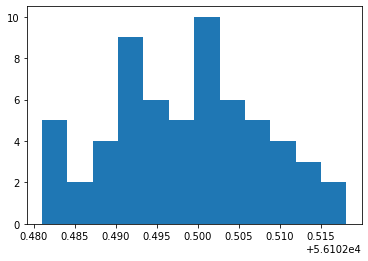

In [15]:
counts, bins, _ = plt.hist(trial['time'], bins = len(trial)//5)

In [16]:
from sklearn.cluster import DBSCAN

In [17]:
X = trial['time'].reshape(-1, 1)
db = DBSCAN(eps=.01, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [18]:
labels = db.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

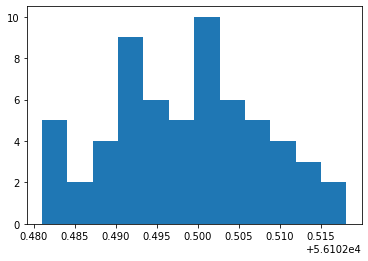

In [19]:
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    
    plt.hist(xy, bins = bins)